<a href="https://colab.research.google.com/github/Muhammad-Nisar-7/Machine-Learning/blob/main/RossmannStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
!pip install opendatasets --quiet
import opendatasets as od
import os
import pandas as pd

In [141]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in "./rossmann-store-sales" (use force=True to force download)


In [142]:
os.listdir('rossmann-store-sales')

['store.csv', 'sample_submission.csv', 'test.csv', 'train.csv']

In [143]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory = False)

In [144]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [145]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')

In [146]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [147]:
merged_df = ross_df.merge(store_df, how = 'left', on = 'Store')

In [148]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [149]:
merged_df.shape

(1017209, 18)

In [150]:
test_df = pd.read_csv('./rossmann-store-sales/test.csv')

In [151]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [152]:
merged_test_df = test_df.merge(store_df, how = "left", on = 'Store')

In [153]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [154]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [155]:
merged_df.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [156]:
round(merged_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [157]:
merged_df.duplicated().sum()

0

In [158]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [159]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [160]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [161]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

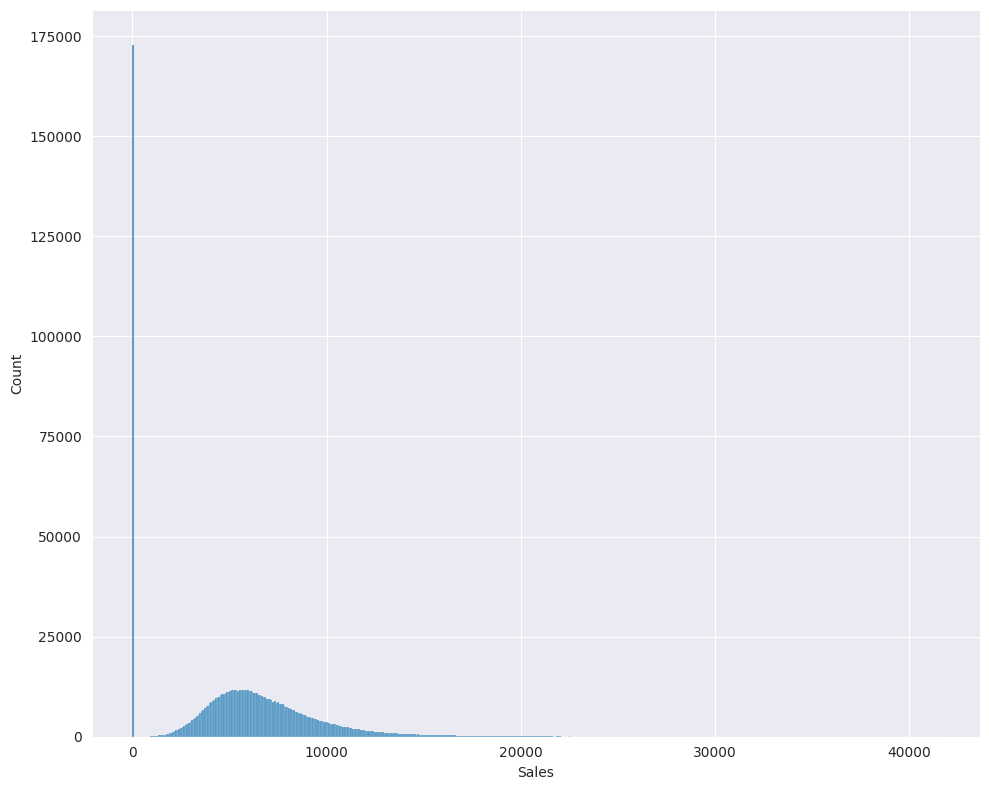

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(merged_df, x='Sales', ax=ax)
plt.tight_layout()
plt.show()


In [163]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [164]:
merged_df = merged_df[merged_df.Open == 1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

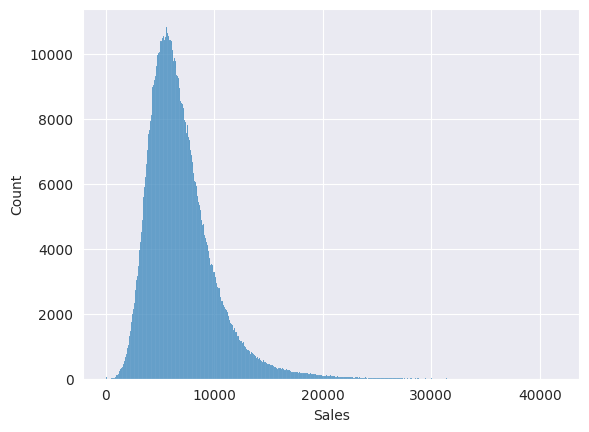

In [165]:
sns.histplot(data = merged_df, x = 'Sales')

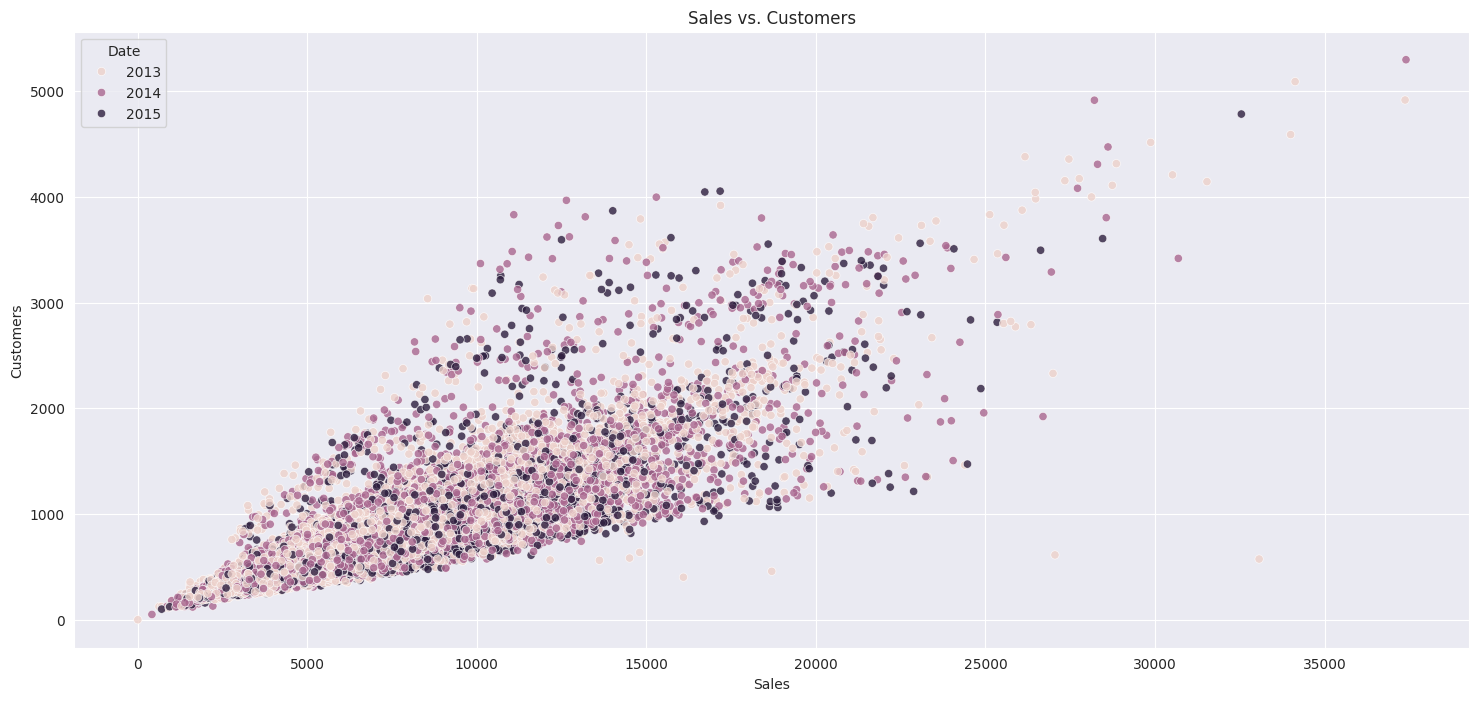

In [166]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x = temp_df.Sales, y = temp_df.Customers, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Sales vs. Customers")
plt.show()

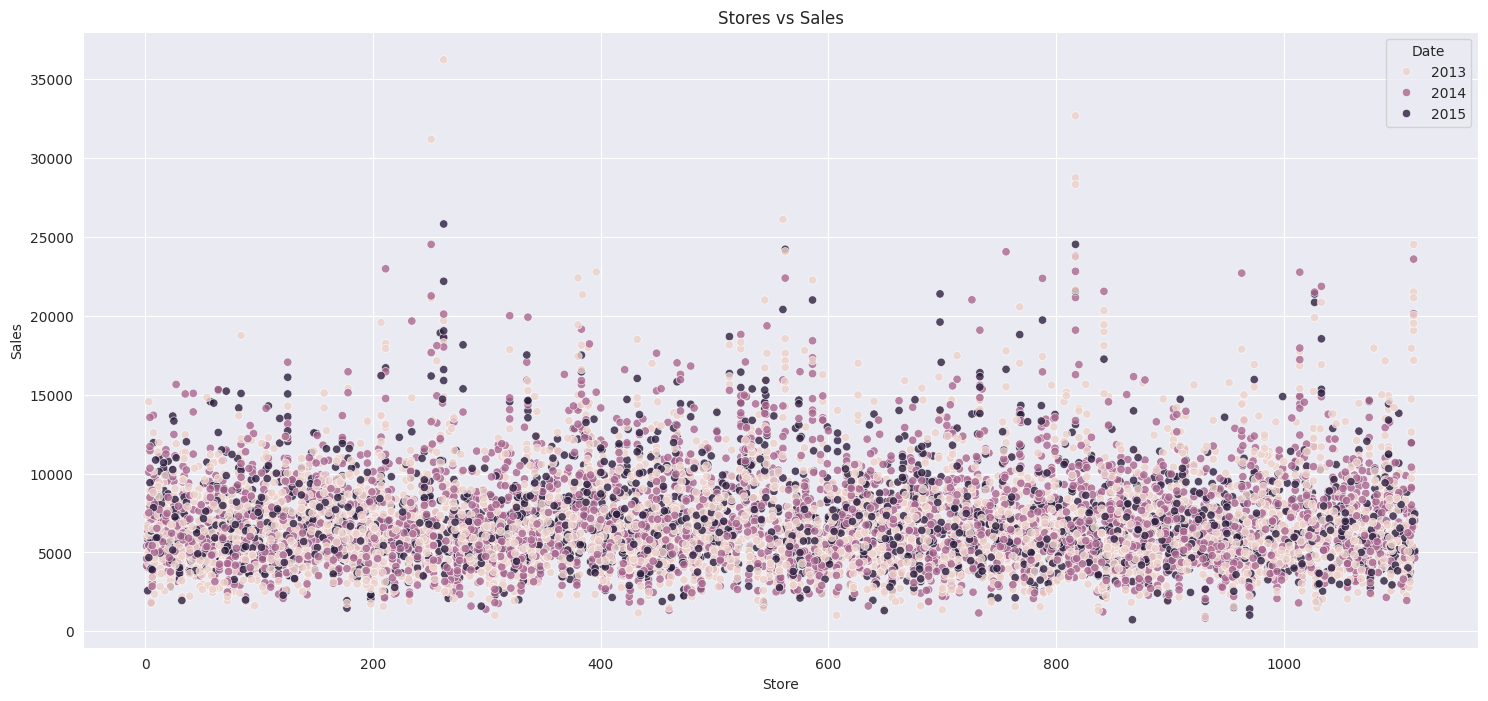

In [167]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x = temp_df.Store, y = temp_df.Sales, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title('Stores vs Sales')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

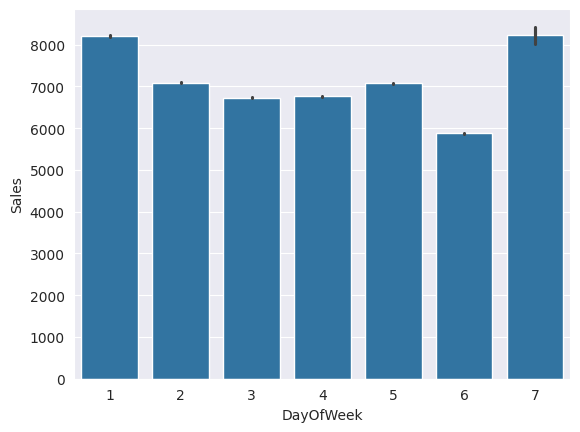

In [168]:
sns.barplot(data = merged_df, x = 'DayOfWeek', y = 'Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

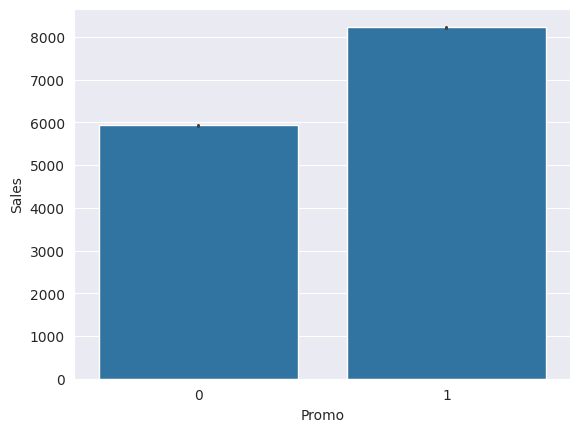

In [169]:
sns.barplot(data = merged_df, x = 'Promo', y = 'Sales')

In [170]:
import numpy as np
merged_df.select_dtypes(include = [np.number]).corr()['Sales'].sort_values(ascending = False)

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396
CompetitionOpenSinceMonth,-0.043489


In [171]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [172]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

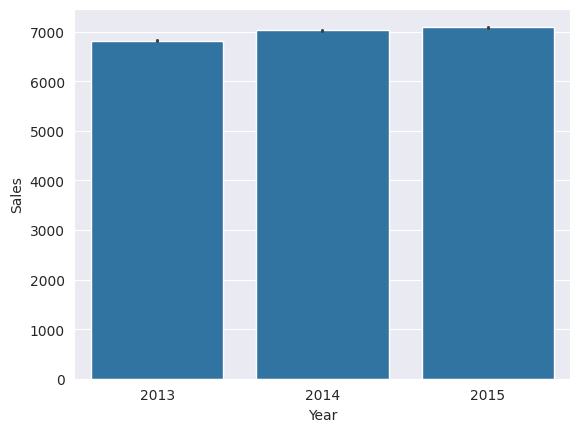

In [173]:
sns.barplot(data = merged_df, x= 'Year', y = 'Sales')

<Axes: xlabel='Month', ylabel='Sales'>

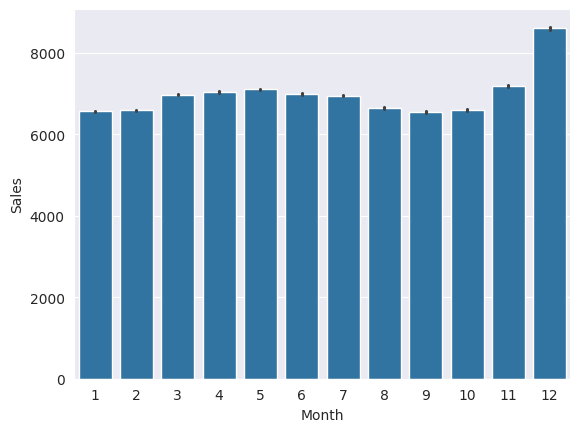

In [174]:
sns.barplot(data = merged_df, x = 'Month', y = 'Sales')

In [175]:
len(merged_df)

844392

In [176]:
sorted_df = merged_df.sort_values('Date')

In [177]:
sorted_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013


In [178]:
train_size = int(0.75 *len(merged_df))
train_size

633294

In [179]:
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [180]:
len(train_df), len(val_df)

(633294, 211098)

In [181]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [182]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [183]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [184]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [185]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [186]:
input_cols = ['Store','DayOfWeek','Promo','StateHoliday',
              'StoreType', 'Assortment','Day', 'Month', 'Year']

In [187]:
target_col = 'Sales'

In [188]:
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


In [189]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [190]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [191]:
test_inputs = merged_test_df[input_cols].copy()

In [192]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols= ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [193]:
from sklearn.impute import SimpleImputer

In [194]:
imputer = SimpleImputer(strategy = 'mean').fit(train_inputs[numeric_cols])

In [195]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [196]:
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [197]:
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [198]:
from sklearn.preprocessing import MinMaxScaler

In [199]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [200]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [201]:
from sklearn.preprocessing import OneHotEncoder

In [202]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(train_inputs[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [203]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [204]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [205]:
train_inputs.head()

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [206]:
X_train = train_inputs[numeric_cols + encoded_cols].copy()
X_val = val_inputs[numeric_cols + encoded_cols].copy()
X_test = test_inputs[numeric_cols + encoded_cols].copy()

In [207]:
def return_mean(inputs):
  return np.full(len(inputs), merged_df.Sales.mean())

In [208]:
train_preds = return_mean(X_train)

In [209]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [210]:
from sklearn.metrics import mean_squared_error

In [211]:
mean_squared_error(train_preds, train_targets, squared =  False)

3082.450443277419

In [212]:
mean_squared_error(return_mean(X_val), val_targets, squared = False)

3168.6033635047716

In [213]:
def guess_random(inputs):
  lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
  return np.random.random(len(inputs)) * (hi-lo) + lo

In [214]:
train_preds = guess_random(X_train)

In [215]:
train_preds

array([33824.40980709, 32803.95317831, 21029.92169669, ...,
        7778.98784978, 37516.76300516, 19879.58266454])

In [216]:
mean_squared_error(train_preds, train_targets, squared=False)

18616.08216114849

In [217]:
mean_squared_error(guess_random(X_val), val_targets, squared = False)

18396.157892537725

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
linreg = LinearRegression()

In [220]:
linreg.fit(X_train, train_targets)

LinearRegression()

In [221]:
linreg.coef_

array([ 1.04781334e+02, -9.97982019e+01,  6.51172904e+02,  1.05495132e+02,
       -8.84995136e+13, -8.84995136e+13, -8.84995136e+13, -8.84995136e+13,
       -8.84995136e+13, -8.84995136e+13, -8.84995136e+13, -1.62329335e+14,
       -1.62329335e+14, -2.05291188e+13, -2.05291188e+13, -2.05291188e+13,
       -2.05291188e+13, -1.54341191e+15, -1.54341191e+15, -1.54341191e+15,
       -1.54341191e+15, -1.86490234e+15, -1.86490234e+15, -1.86490234e+15])

In [222]:
train_preds = linreg.predict(X_train)

In [223]:
train_preds

array([ 7115. , 10581. ,  7036. , ...,  6243. ,  5999. ,  5618.5])

In [224]:
mean_squared_error(train_preds, train_targets, squared = False)

2741.5860353706703

In [225]:
val_preds = linreg.predict(X_val)
mean_squared_error(val_preds, val_targets, squared = False)

2817.656190781348

In [226]:
def try_model(model):
  model.fit(X_train, train_targets)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)

  train_rmse = mean_squared_error(train_preds, train_targets, squared=False)
  val_rmse = mean_squared_error(val_preds, val_targets,  squared= False )
  return train_rmse, val_rmse

In [227]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [228]:
model = LinearRegression()
try_model(model)

(2741.5860353706703, 2817.656190781348)

In [229]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [234]:
try_model(Lasso())
?Lasso

In [231]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [232]:
try_model(SGDRegressor())

(2741.7805510742637, 2815.8283845409997)

In [236]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [238]:
tree = DecisionTreeRegressor(random_state = 42)
try_model(tree)

(0.0, 1559.7378600480247)

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.267\nsquared_error = 20739758.

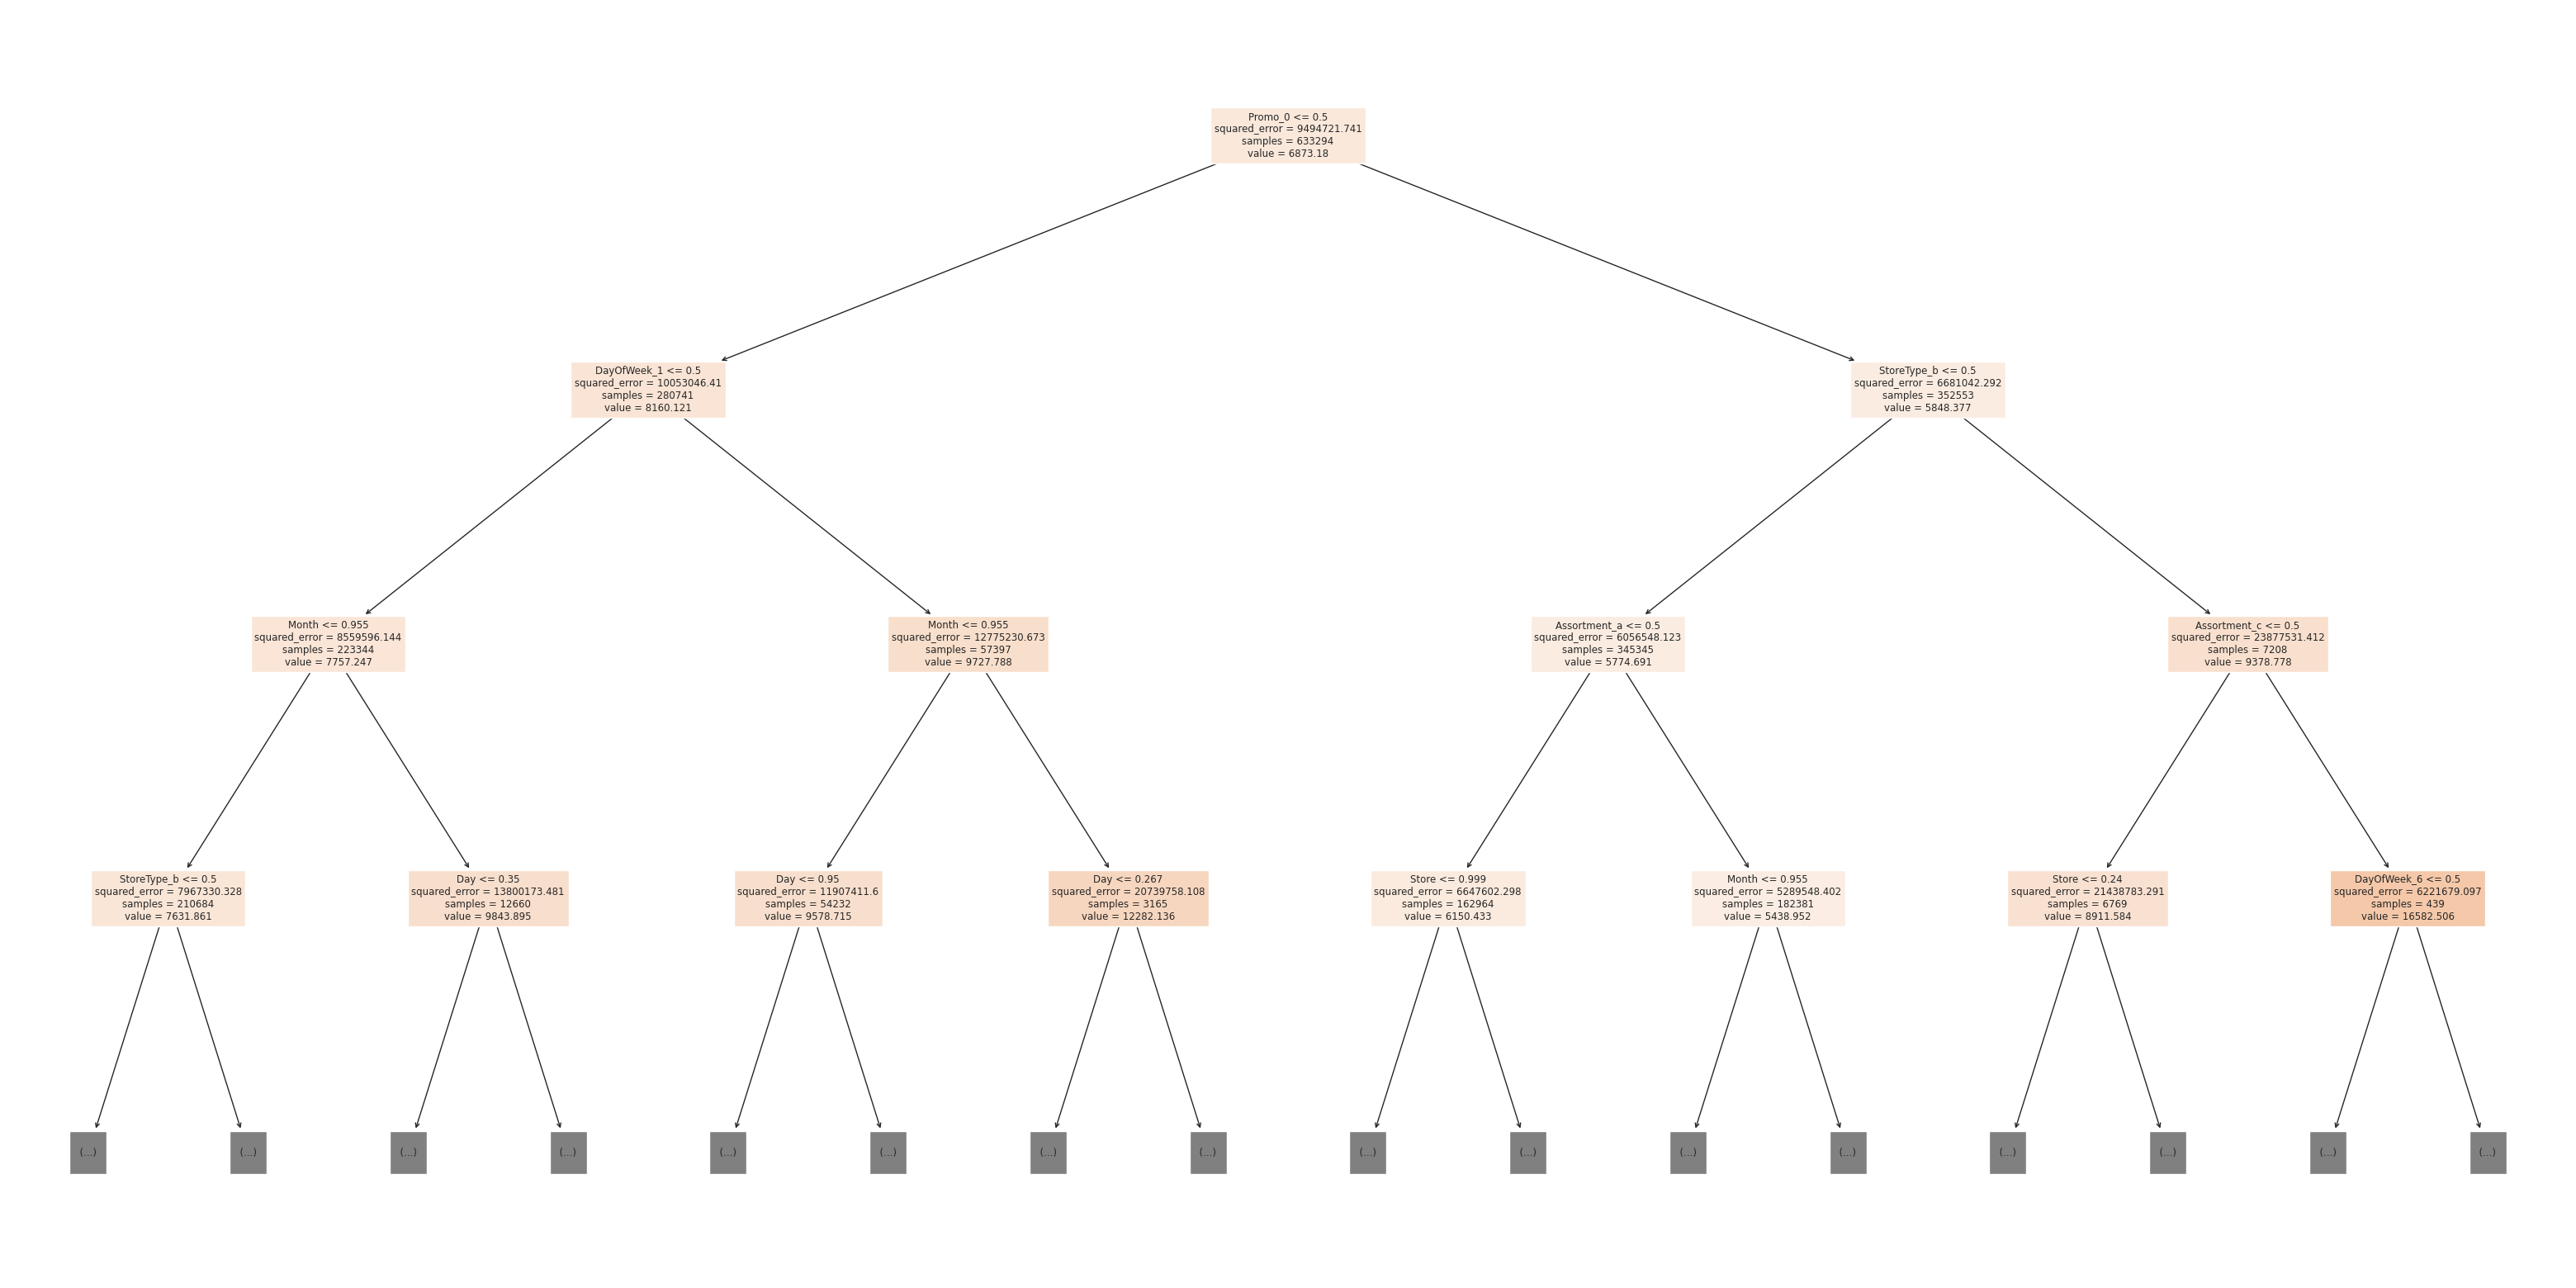

In [240]:
plt.figure(figsize = (40,20))
plot_tree(tree, filled = True, feature_names=X_train.columns, max_depth = 3)

In [241]:
from sklearn.ensemble import RandomForestRegressor

In [243]:
rf = RandomForestRegressor(random_state = 42, n_jobs = -1)

In [244]:
try_model(rf)

(474.9198974666898, 1371.7321923469985)

In [249]:
tree.tree_.max_depth

61